In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmasher as cmr # for nice colormaps
from fbs import generate_planar_fractional_brownian_surface, generate_spherical_fractional_brownian_surface

# Generating a planar fractional Brownian surface

In [8]:
H = 0.7

z = generate_planar_fractional_brownian_surface(1600, 900, H=H, num_components=50)

1D fBms generated in 3.128 seconds


100%|██████████| 100/100 [00:01<00:00, 59.39it/s]


planar fractional Brownian surface generated in 5.863 seconds


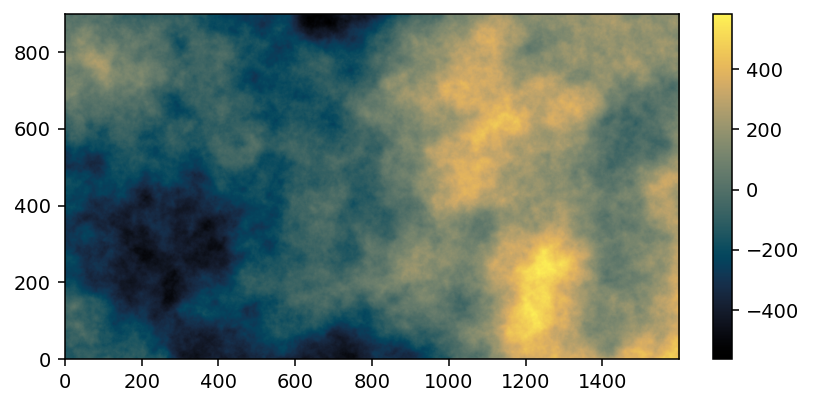

In [12]:
cmap = cmr.eclipse
fig, (ax, cax) = plt.subplots(
    1, 2, figsize=(6, 3), gridspec_kw={'width_ratios': [1, 0.03]}, layout='tight', dpi=140
)
im = ax.imshow(z, cmap=cmap, origin='lower', aspect='equal')
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

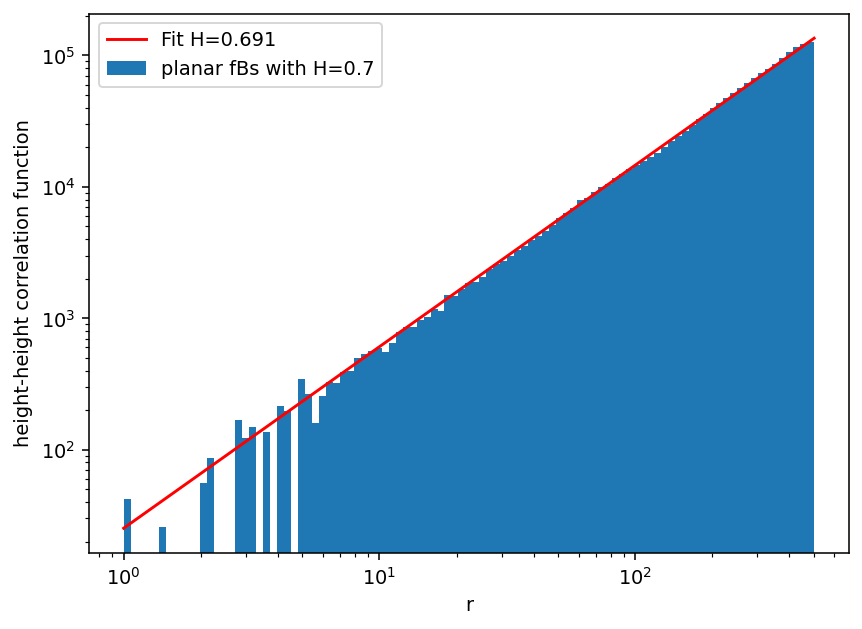

In [4]:
from scipy.stats import binned_statistic

# Plot the rough height-height correlation function
n = 10000000
r_max = 500
ix1 = np.random.randint(r_max, z.shape[0] - r_max, n)
iy1 = np.random.randint(r_max, z.shape[1] - r_max, n)
ix2 = np.random.randint(0, z.shape[0], n)
iy2 = np.random.randint(0, z.shape[1], n)

r = np.sqrt((ix1 - ix2)**2 + (iy1 - iy2)**2)
# calculate the squared height difference
dz2 = (z[ix1, iy1] - z[ix2, iy2])**2

r_bins = np.exp(np.linspace(np.log(1), np.log(r_max), 100))
r_bins_center = 0.5*(r_bins[1:] + r_bins[:-1])
# bin average values of dz2 using binned_statistic
dz2_bins, *_ = binned_statistic(r, dz2, bins=r_bins, statistic='mean')
dz2_bins = np.nan_to_num(dz2_bins)


# Fit a linear relation to the data
m, b = np.polyfit(np.log(r_bins_center[dz2_bins!=0]), np.log(dz2_bins[dz2_bins!=0]), 1)

fig, ax = plt.subplots(figsize=(7, 5), dpi=140)
ax.plot(r_bins, np.exp(m*np.log(r_bins) + b), 'r-', label=f'Fit H={m/2:.3f}')

ax.stairs(dz2_bins, r_bins, fill=True, label=f'planar fBs with H={H}')
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('height-height correlation function')
ax.set_xlabel('r')
plt.show()

# Generating a spherical fractional Brownian surface

In [13]:
z = generate_spherical_fractional_brownian_surface(2048, H=H, num_components=50)

1D fBms generated in 0.244 seconds


100%|██████████| 100/100 [00:12<00:00,  8.08it/s]

spherical fractional Brownian surface generated in 12.629 seconds


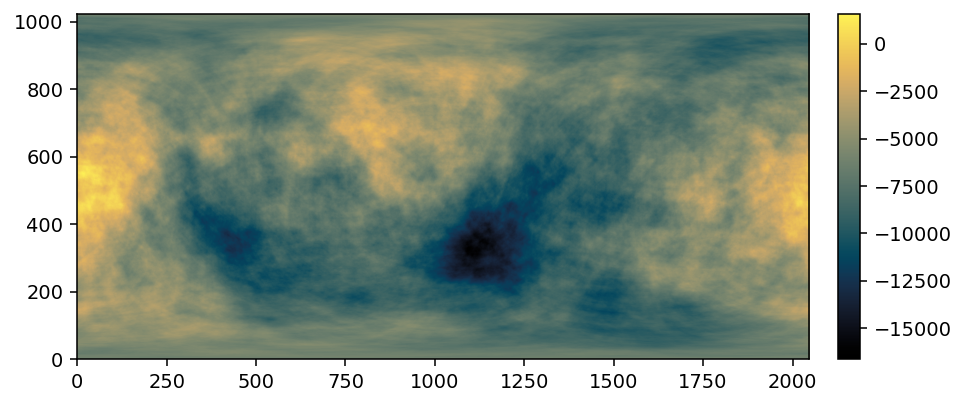

In [21]:
fig, (ax, cax) = plt.subplots(
    1, 2, figsize=(7, 3), gridspec_kw={'width_ratios': [1, 0.03]}, layout='tight', dpi=140
)
im = ax.imshow(z, cmap=cmap, origin='lower', aspect='auto')
fig.colorbar(im, cax=cax, orientation='vertical')
fig.savefig('example_planar_fractional_brownian_surface.png', transparent=True, bbox_inches='tight', dpi=140)
plt.show()

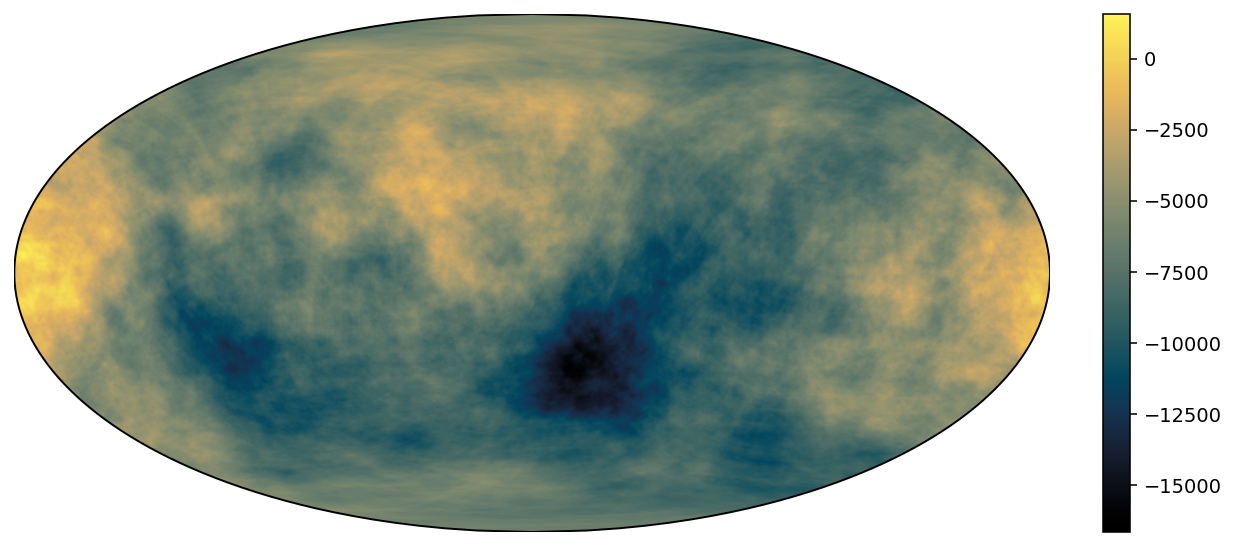

In [31]:
# Make a mollweide plot of the surface where the color is the height
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig, (ax, cax) = plt.subplots(
    1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [1, 0.02]}, dpi=140, layout='tight'
)
m = Basemap(projection='moll', lon_0=0, resolution='c', ax=ax)
im = m.imshow(z, cmap=cmap, origin='lower')
fig.colorbar(im, cax=cax, orientation='vertical')
fig.savefig('example_spherical_fractional_brownian_surface.png', transparent=True, bbox_inches='tight', dpi=140)
plt.show()


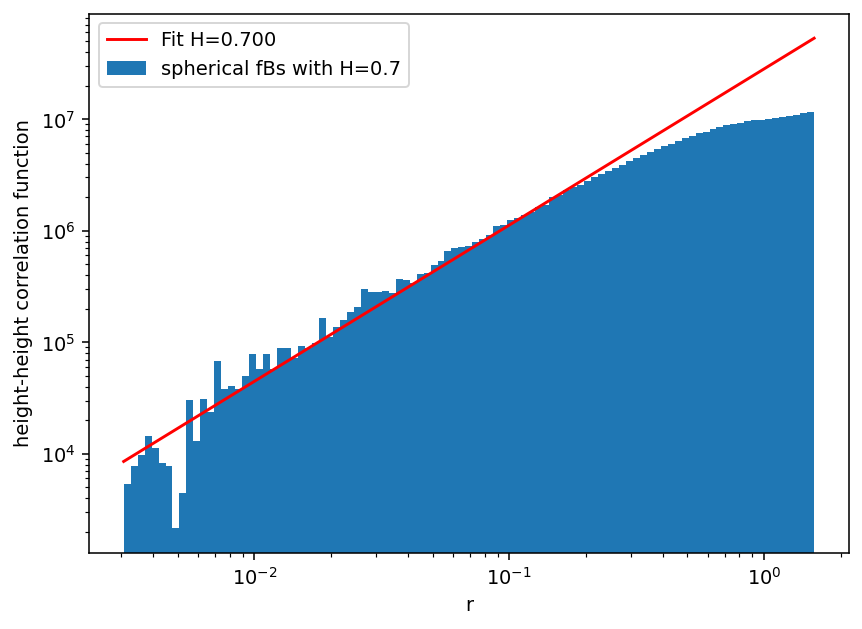

In [17]:
from scipy.stats import binned_statistic

# Plot the rough height-height correlation function
n = 10000000
r_max = np.pi/2
r_min = np.pi/z.shape[0]
# Generate n pairs of random unit vectors
rng = np.random.default_rng(42)
lon1 = rng.uniform(-np.pi, np.pi, n)
lat1 = np.arcsin(rng.uniform(-1, 1, n))
lon2 = rng.uniform(-np.pi, np.pi, n)
lat2 = np.arcsin(rng.uniform(-1, 1, n))

# Find the indices on the height map
ix1 = ((lon1 + np.pi) * z.shape[0] / (2*np.pi)).astype(int)
iy1 = ((lat1 + np.pi/2) * z.shape[1] / np.pi).astype(int)
ix2 = ((lon2 + np.pi) * z.shape[0] / (2*np.pi)).astype(int)
iy2 = ((lat2 + np.pi/2) * z.shape[1] / np.pi).astype(int)

# Find the distance along the sphere
r = np.arccos(np.sin(lat1)*np.sin(lat2) + np.cos(lat1)*np.cos(lat2)*np.cos(lon1 - lon2))
dz2 = (z[ix1, iy1] - z[ix2, iy2])**2

r_bins = np.exp(np.linspace(np.log(r_min), np.log(r_max), 100))
r_bins_center = 0.5*(r_bins[1:] + r_bins[:-1])
# bin average values of dz2 using binned_statistic
dz2_bins, *_ = binned_statistic(r, dz2, bins=r_bins, statistic='mean')
dz2_bins = np.nan_to_num(dz2_bins)


# Fit a linear relation to the data
m, b = np.polyfit(np.log(r_bins_center[dz2_bins!=0][:-20]), np.log(dz2_bins[dz2_bins!=0][:-20]), 1)

fig, ax = plt.subplots(figsize=(7, 5), dpi=140)
ax.plot(r_bins, np.exp(m*np.log(r_bins) + b), 'r-', label=f'Fit H={m/2:.3f}')

ax.stairs(dz2_bins, r_bins, fill=True, label=f'spherical fBs with H={H}')
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('height-height correlation function')
ax.set_xlabel('r')
plt.show()